Quick check of mean volume flux throuhg a transect in Rosario Strait 

In [1]:
import sys
sys.path.append('/data/nsoontie/MEOPAR/mixing-paper/analysis')

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import netCDF4 as nc

import mixing
from nowcast import analyze

from salishsea_tools import viz_tools

%matplotlib inline

# Load Nowcast-green

In [2]:
grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')

In [3]:
sdt = datetime.datetime(2016,4,1)
edt = datetime.datetime(2016,7,28)
xs=slice(200,380)
ys=slice(200,400)
files = analyze.get_filenames(sdt, edt, '1d', 'grid_V', '/results/SalishSea/nowcast-green/')
d = xr.open_dataset(files[0]).isel(x=xs, y=ys)
for f in files[1:]:
    with xr.open_dataset(f).isel(x=xs, y=ys) as d1:
        d =xr.concat([d,d1],dim='time_counter',data_vars='minimal')


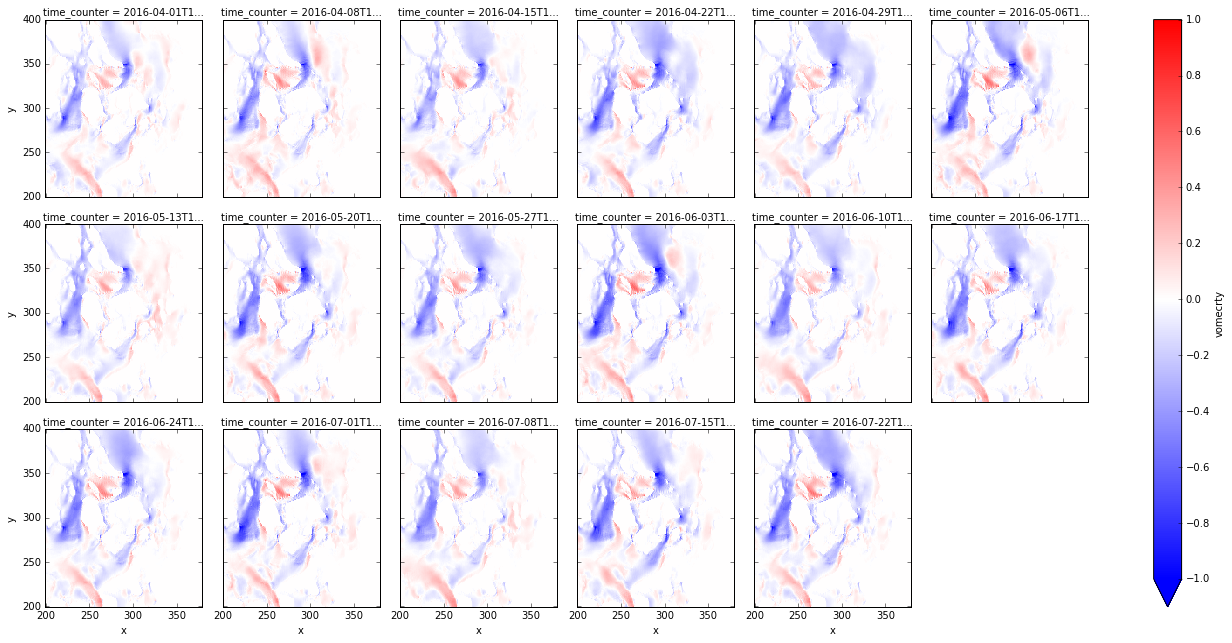

In [4]:
V_surface = d.sel(depthv=0,method='nearest').vomecrty
V_surface.resample('7D', dim='time_counter').plot(col='time_counter', col_wrap=6,x='x',y='y',
                      vmin=-1,vmax=1,cmap='bwr')

(150, 0)

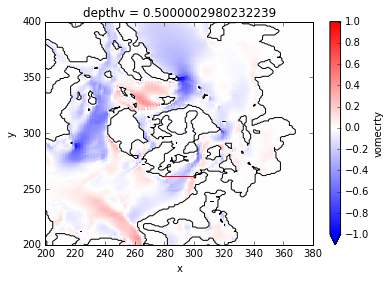

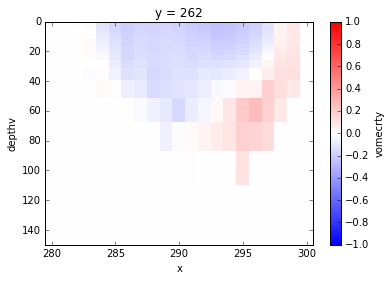

In [5]:
j=262
iss=280
iee = 300
fig,ax= plt.subplots(1,1)
d.sel(depthv=0,method='nearest').vomecrty.mean(dim='time_counter').plot(ax=ax,
                                                                        vmin=-1,vmax=1,cmap='bwr')
ax.plot([iss,iee],[j,j],'r-')
viz_tools.plot_coastline(ax,grid)
ax.set_xlim([200,380])
ax.set_ylim([200,400])
fig,ax=plt.subplots(1,1)
d.sel(x=slice(iss,iee), y=j).vomecrty.mean(dim='time_counter').plot(ax=ax,vmin=-1,vmax=1,cmap='bwr')
ax.set_ylim([150,0])


In [6]:
mesh = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone2.nc')
e3v = mesh.variables['e3v_0'][:,:,j,iss:iee+1]
e1v = mesh.variables['e1v'][:,j,iss:iee+1]
e1v = np.expand_dims(e1v,1)

In [7]:
xslice = slice(iss,iee)
V = d.vomecrty.sel(x=xslice, y=j)
flux = np.sum( V.mean(dim='time_counter').values[:]*e3v*e1v)

In [8]:
flux

-22432.136412413209